The code below trys to explore the last 2 bullet points of analyzing the history data. 

I followed the code that I found online:
https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6

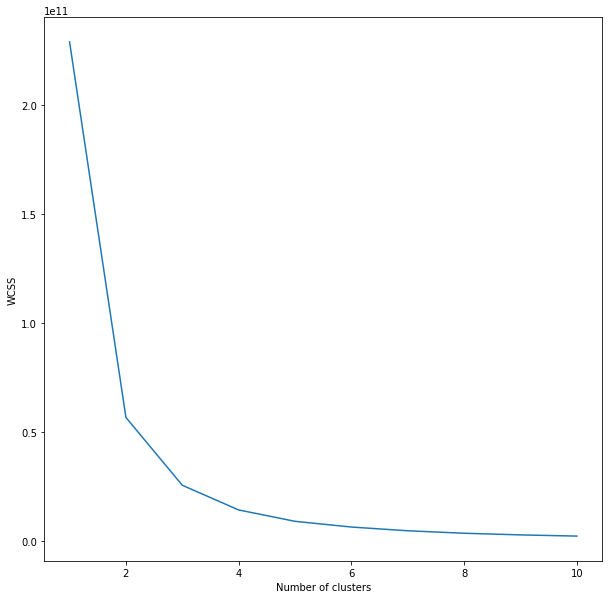

In [1]:
#lets look at k-means 
#finding appropriate number of clusters 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline 

history = pd.read_csv("user_history.csv")#.drop(['USER ID'],axis=1)
user_history=history
user_ratings = pd.read_csv("user_ratings.csv")
user_ratings_table = pd.pivot_table(user_ratings,values='RATING', index='USER ID',
                    columns='PRODUCT')
#using elbow method to find optimal number of clusters to partition history data
#kmeans = KMeans(n_clusters=2, random_state=0).fit(history)
wcss = []
for i in range(1,11):
    kmodel = KMeans(n_clusters = i, init = "k-means++")
    kmodel.fit(history)
    wcss.append(kmodel.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From graph we can see that the optimal number of clusters to partition the history data is 3. 



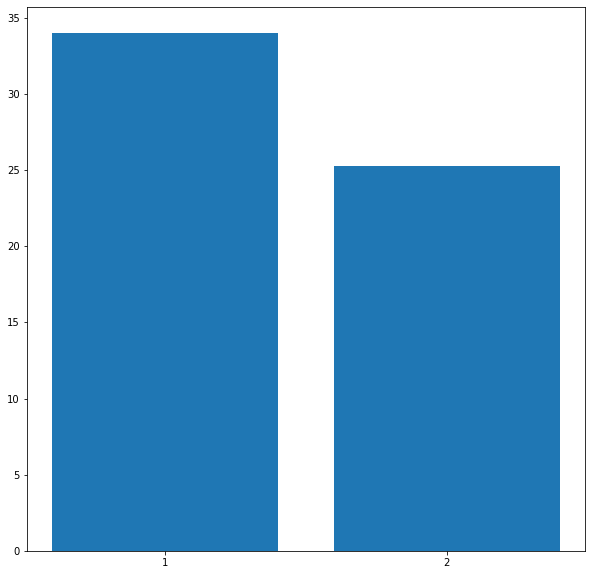

[1 2 0 ... 1 0 0]


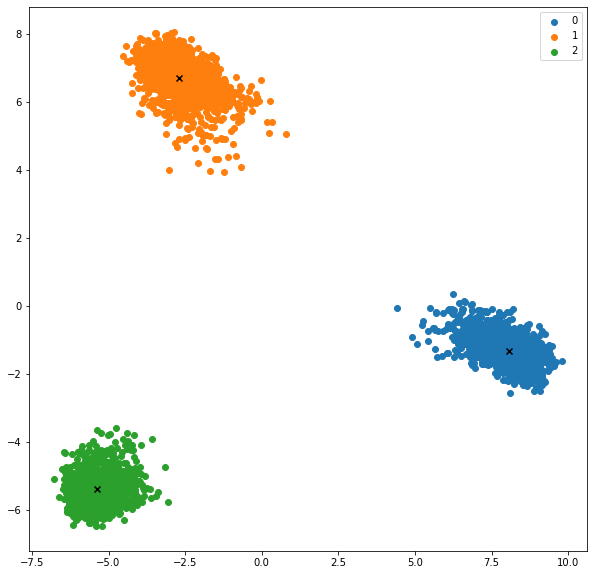

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
#change data into 2-dimensions
pca = PCA(2)
history = StandardScaler().fit_transform(history)
data = pca.fit_transform(history)

#check variance of components 
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

#train k means and pca
kmeans = cluster.KMeans(3)
kmeans.fit(data)
centers = np.array(kmeans.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(data)
print(label)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    #print(len(data[label == i , 0] ))
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
#plt.set_title('PCA', fontsize = 20)
plt.show()

In [3]:
all_data=pd.merge(user_history,user_ratings_table,right_index=True,left_on='USER ID',how='outer' )
all_data['cluster']=label
cluster_0=all_data[all_data['cluster']==0]
cluster_1=all_data[all_data['cluster']==1]
cluster_2=all_data[all_data['cluster']==2]
print(cluster_0)

      USER ID  alpine kimono  sweden kansas  student icon  supreme ivan  \
2      100962       0.281717       5.046727      4.407484      2.138591   
4      100974       0.485729       4.633607      4.120416      1.497073   
8      100994       0.755271       3.504614      2.963729      0.826123   
16     101044       0.470714       3.366680      2.730647      0.818990   
18     101051       0.672489       3.262407      3.574443      1.433475   
...       ...            ...            ...           ...           ...   
4487   125562       0.341492       4.115765      3.876671      1.439626   
4490   125574       0.826475       2.702580      1.613089      0.769936   
4495   125614       0.200730       3.819307      3.793920      1.352770   
4498   125636       0.096291       3.028528      2.554836      0.404308   
4499   125645       0.595734       2.072896      1.997112      0.553371   

      albert charlie  heavy trapeze  fabric tokyo  brother robin  \
2           1.075562       0.38

In [4]:
#cov_matrix = np.cov(history)
#eigen_val = np.linalg.eig(cov_matrix)
from sklearn.linear_model import LinearRegression
#table of principle components 
his_pca = pd.DataFrame(data = data, columns = ['principal component 1', 'principal component 2'])
#print(his_pca)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#choose pc 1 as features since have higher variance ratio
features = np.zeros((4500, 75))
features[: , 0] = his_pca.iloc[:, 1]
user_ratings = pd.read_csv("user_ratings.csv")
user_ratings_table = pd.pivot_table(user_ratings,values='RATING', index=['USER ID'], columns='PRODUCT')
#print(user_ratings_table)
#mn = user_ratings_table[1:]
#print(mn)


Explained variation per principal component: [0.33984813 0.25309902]


In [5]:
#print(features)

In [6]:
products=user_ratings_table.columns
#print(products)
#print(products[0])

In [7]:
#looking at the 3 clusters 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
cluster_0_predict=[]
ID=cluster_0['USER ID']
df0=pd.DataFrame(ID)
for i in range(101,176):
    product=products[i-101]
    X=cluster_0.iloc[:,0:101]
    Y=cluster_0.iloc[:,[0,i]]
    Y=Y[~Y.iloc[:,1].isna()]
    data=pd.merge(X,Y,how='inner')
    feature=data.iloc[:,1:101]
    target=data.iloc[:,-1]
    reg.fit(feature, target)
    features=cluster_0.iloc[:,1:101]
    prediction=reg.predict(features)
    cluster_0_predict.append(prediction)
    df0[product]=prediction
print(df0)

cluster_1_predict=[]
ID=cluster_1['USER ID']
df1=pd.DataFrame(ID)
for i in range(101,176):
    product=products[i-101]
    X=cluster_1.iloc[:,0:101]
    Y=cluster_1.iloc[:,[0,i]]
    Y=Y[~Y.iloc[:,1].isna()]
    data=pd.merge(X,Y,how='inner')
    feature=data.iloc[:,1:101]
    target=data.iloc[:,-1]
    reg.fit(feature, target)
    features=cluster_1.iloc[:,1:101]
    prediction=reg.predict(features)
    df1[product]=prediction
print(df1)

cluster_1_predict=[]
ID=cluster_1['USER ID']
df2=pd.DataFrame(ID)
for i in range(101,176):
    product=products[i-101]
    X=cluster_2.iloc[:,0:101]
    Y=cluster_2.iloc[:,[0,i]]
    Y=Y[~Y.iloc[:,1].isna()]
    data=pd.merge(X,Y,how='inner')
    feature=data.iloc[:,1:101]
    target=data.iloc[:,-1]
    reg.fit(feature, target)
    features=cluster_2.iloc[:,1:101]
    prediction=reg.predict(features)
    df2[product]=prediction
print(df2)

      USER ID  adrian crater  anagram mentor  apropos pizza  bandit anatomy  \
2      100962       7.454434        9.901831       3.965047       10.735404   
4      100974       4.336143       10.650196       5.981570        9.127015   
8      100994      -1.027724        7.092183       8.912277        3.378525   
16     101044       5.488888        2.645021       3.591881        3.473508   
18     101051       9.676673        5.981267       0.833677        8.952572   
...       ...            ...             ...            ...             ...   
4487   125562       3.960858       11.093584       6.319374        6.550707   
4490   125574      -4.499265        6.231692      10.862216        0.044252   
4495   125614       4.244963        6.366756       5.831632        7.171340   
4498   125636       0.047842        3.511226       7.109068        1.742156   
4499   125645       5.759086        1.830700       4.089282        0.794245   

      banjo ladder  barcode arnold  bazooka diagram

In [72]:
merged=pd.merge(pd.merge(df0,df1),df2)
merged=pd.merge(pd.merge(df0,df1,how='outer'),df2,how='outer')
#m = pd.pivot_table(merged,values='RATING', index='USER ID',columns='PRODUCT')
k = merged.to_numpy()
print(merged.columns)
print(pd.read_csv("user_ratings.csv")['PRODUCT'])

Index(['USER ID', 'adrian crater', 'anagram mentor', 'apropos pizza',
       'bandit anatomy', 'banjo ladder', 'barcode arnold', 'bazooka diagram',
       'bronze mystic', 'calypso zigzag', 'casino unit', 'civil book',
       'company polo', 'conan antenna', 'current pony', 'diploma moment',
       'distant list', 'evita soviet', 'forum bravo', 'front salami',
       'garden jimmy', 'helium exact', 'horizon norway', 'house vodka',
       'image jessica', 'imagine disco', 'inch fragile', 'june monica',
       'kayak analog', 'kitchen active', 'lobster diana', 'lotus sherman',
       'meteor slalom', 'meter sigma', 'mexico stretch', 'motor modular',
       'nina sailor', 'ninja history', 'optimal recycle', 'oregano option',
       'oxford open', 'panic inside', 'pepper chicago', 'peru king',
       'picnic locate', 'popcorn shannon', 'premium bread', 'process volume',
       'risk corona', 'ritual product', 'sabine danube', 'saint desert',
       'salsa impress', 'salute joshua', 'scale 

In [87]:
rate= merged.melt(id_vars=['USER ID'], var_name='PRODUCT', value_name='RATINGS')
rate = rate.set_index('USER ID')
print(rate)
rate.to_csv('predictions.csv')

               PRODUCT   RATINGS
USER ID                         
100962   adrian crater  7.454434
100974   adrian crater  4.336143
100994   adrian crater -1.027724
101044   adrian crater  5.488888
101051   adrian crater  9.676673
...                ...       ...
125561    wheel gibson  3.800901
125572    wheel gibson  1.057147
125582    wheel gibson  9.115291
125591    wheel gibson  4.304668
125629    wheel gibson  1.595573

[337500 rows x 2 columns]
